In [48]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [49]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [50]:
bank_note_data = pd.read_csv("../data/data_banknote_authentication.csv")
bank_note_data.head()

,Variance,Skewness,curtosis,entropy,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [51]:
bank_note_data.shape

(1372, 5)

<AxesSubplot:xlabel='target', ylabel='count'>

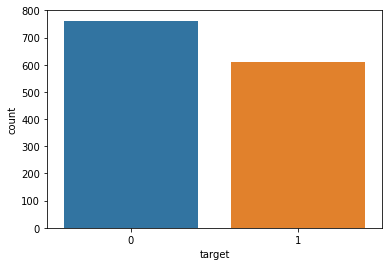

In [52]:
sns.countplot(x='target', data=bank_note_data)

In [53]:
X = bank_note_data.drop(['target'], axis=1).values
y = bank_note_data['target'].values
print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


In [54]:
#split in to train and test features and targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# standardise data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
def create_model(learning_rate, dropoute_rate):
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropoute_rate))
    model.add(Dense(6,activation='relu'))
    model.add(Dropout(dropoute_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    adam = Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])
    return model

In [57]:
dropoute_rate = 0.1
epochs = 20
batch_size = 4
learning_rate = 0.001

In [58]:
model = create_model(learning_rate, dropoute_rate)

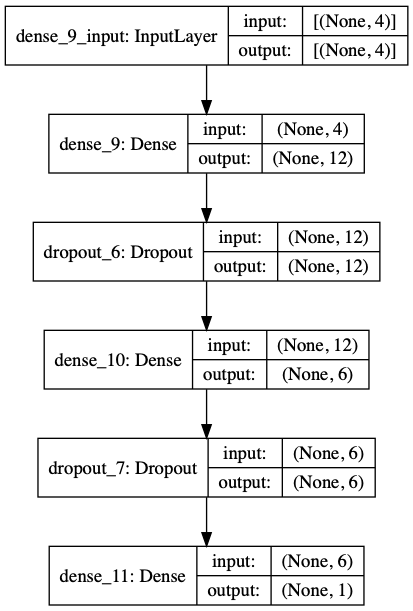

In [59]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="../images/model_plot1.png", show_shapes=True, show_layer_names=True)

In [60]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/20
220/220 [==============================] - 1s 1ms/step - loss: 0.6853 - accuracy: 0.5056 - val_loss: 0.6036 - val_accuracy: 0.8409
Epoch 2/20
220/220 [==============================] - 0s 811us/step - loss: 0.5632 - accuracy: 0.8368 - val_loss: 0.4048 - val_accuracy: 0.9091
Epoch 3/20
220/220 [==============================] - 0s 827us/step - loss: 0.3768 - accuracy: 0.8679 - val_loss: 0.2125 - val_accuracy: 0.9455
Epoch 4/20
220/220 [==============================] - 0s 842us/step - loss: 0.2171 - accuracy: 0.9216 - val_loss: 0.1250 - val_accuracy: 0.9727
Epoch 5/20
220/220 [==============================] - 0s 875us/step - loss: 0.1683 - accuracy: 0.9565 - val_loss: 0.0824 - val_accuracy: 0.9864
Epoch 6/20
220/220 [==============================] - 0s 844us/step - loss: 0.1203 - accuracy: 0.9807 - val_loss: 0.0586 - val_accuracy: 0.9864
Epoch 7/20
220/220 [==============================] - 0s 881us/step - loss: 0.1128 - accuracy: 0.9702 - val_loss: 0.0451 - val_accuracy: 0

In [61]:
# Evaluation 
accuracies = model.evaluate(X_test, y_test, verbose=1)

9/9 [==============================] - 0s 948us/step - loss: 0.0127 - accuracy: 0.9964


In [62]:
print("test score", accuracies[0])
print("test accuracy", accuracies[1])

test score 0.012672921642661095
test accuracy 0.996363639831543


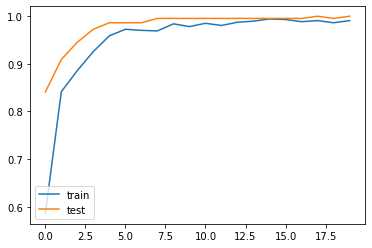

In [63]:
import matplotlib.pyplot as plt 
plt.plot(model_history.history['accuracy'], label="accuracy")
plt.plot(model_history.history['val_accuracy'], label="val_accuracy")
plt.legend(['train', 'test'], loc= "lower left")

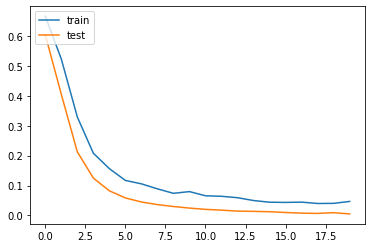

In [64]:
plt.plot(model_history.history['loss'], label="loss")
plt.plot(model_history.history['val_loss'], label="val_loss")
plt.legend(['train', 'test'], loc= "upper left")